LEZIONE 3 - ESERCIZIO 1

In [1]:
import numpy as np
import scipy.stats
import pylab as plt

In [2]:
def f(x, sigma):
    return 0.5* np.sqrt(2*np.pi*sigma**2) * x**3

We divided by 2 because we computed the absolute value of the distribution, in order to integrate only over the positive x

In [3]:
def inte (x, sigma, N):
    return (1/N)* np.sum(f(x, sigma)) 

In [4]:
mu, sigma = 0., 5. # mean and standard deviation
N = 10000

In [5]:
x_i_abs = np.abs(np.random.normal(mu, sigma, N))

In [6]:
inte_value = inte(x_i_abs, sigma, N)
expected_value = 2*sigma**4

print('Integral: ' + str(inte_value))
print('Expected value: ' + str(expected_value))

Integral: 1244.7001329294246
Expected value: 1250.0


In [7]:
error = np.abs(inte_value - expected_value)
print('Error: ' + str(error))

Error: 5.299867070575374


(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  3.,  3.,  1.,
         3.,  2.,  5.,  4.,  1.,  4.,  6.,  6.,  3.,  6.,  6., 16.,  4.,
         3.,  2.,  2.,  6.,  1.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([-82.31854035, -78.40638746, -74.49423456, -70.58208167,
        -66.66992877, -62.75777588, -58.84562298, -54.93347009,
        -51.02131719, -47.1091643 , -43.1970114 , -39.28485851,
        -35.37270561, -31.46055272, -27.54839982, -23.63624693,
        -19.72409403, -15.81194114, -11.89978824,  -7.98763535,
         -4.07548245,  -0.16332956,   3.74882334,   7.66097623,
         11.57312913,  15.48528202,  19.39743492,  23.30958781,
         27.22174071,  31.1338936 ,  35.0460465 ,  38.95819939,
         42.87035229,  46.78250518,  50.69465808,  54.60681097,
         58.51896387,  62.43111676,  66.34326965,  70.25542255,
         74.16757544,  78.07972834,  81.99188123,  85.90403413,
         89.

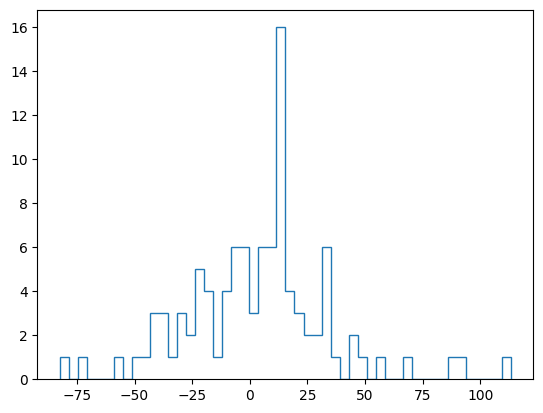

In [8]:
n_toy=100
error_toy = np.zeros(n_toy, dtype=float)

for i_toy in range(n_toy):
    x_i_abs = np.abs(np.random.normal(mu, sigma, N))
    inte_value = inte(x_i_abs, sigma, N)
    expected_value = 2*sigma**4
    error = inte_value - expected_value
    error_toy[i_toy]=error
    
plt.hist(error_toy,bins=50,histtype='step')

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  1.,  1.,
         3.,  1.,  4.,  6.,  7.,  3.,  7., 10.,  7.,  5.,  8., 13.,  8.,
        10., 14.,  8.,  8., 13., 14., 16., 13., 20., 23., 28., 23., 25.,
        27., 22., 27., 28., 22., 28., 25., 28., 20., 29., 17., 22., 28.,
        34., 22., 25., 18., 27., 20., 22., 20., 20., 10., 11., 16., 19.,
        12., 11.,  7., 12.,  8., 10.,  6.,  6.,  2.,  7.,  1.,  4.,  2.,
         2.,  4.,  2.,  1.,  1.,  1.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-87.29188182, -85.40975152, -83.52762121, -81.6454909 ,
        -79.76336059, -77.88123028, -75.99909998, -74.11696967,
        -72.23483936, -70.35270905, -68.47057874, -66.58844844,
        -64.70631813, -62.82418782, -60.94205751, -59.05992721,
        -57.1777969 , -55.29566659, -53.41353628, -51.53140597,
        -49.64927567, -47.76714536, -45.88501505, -44.00288474,
        -42.12075443, -40.23862413, -38.35649382, 

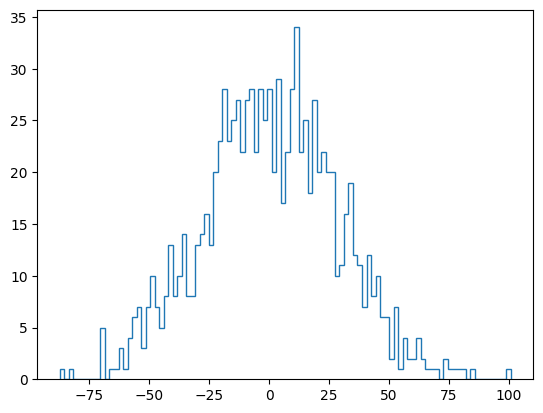

In [9]:
n_toy=1000
error_toy = np.zeros(n_toy, dtype=float)

for i_toy in range(n_toy):
    x_i_abs = np.abs(np.random.normal(mu, sigma, N))
    inte_value = inte(x_i_abs, sigma, N)
    expected_value = 2*sigma**4
    error = inte_value - expected_value
    error_toy[i_toy]=error
    
plt.hist(error_toy,bins=100,histtype='step')

(array([  1.,   0.,   1.,   1.,   0.,   1.,   5.,   3.,   1.,   5.,   5.,
          9.,   8.,   8.,   6.,  15.,  15.,  23.,  30.,  30.,  45.,  43.,
         50.,  54.,  78.,  89.,  96., 105., 121., 110., 139., 162., 159.,
        167., 223., 241., 247., 237., 255., 280., 265., 282., 296., 310.,
        310., 318., 302., 323., 334., 304., 311., 272., 269., 279., 256.,
        235., 199., 173., 225., 195., 163., 126., 157., 147., 127., 110.,
        101.,  86.,  67.,  48.,  59.,  45.,  43.,  48.,  26.,  24.,  24.,
          8.,  12.,  12.,   7.,   7.,   5.,   6.,   1.,   4.,   2.,   0.,
          2.,   0.,   1.,   2.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.]),
 array([-100.84469053,  -98.68426245,  -96.52383438,  -94.3634063 ,
         -92.20297823,  -90.04255015,  -87.88212208,  -85.721694  ,
         -83.56126593,  -81.40083786,  -79.24040978,  -77.07998171,
         -74.91955363,  -72.75912556,  -70.59869748,  -68.43826941,
         -66.27784133,  -64.11741326,  -61.956

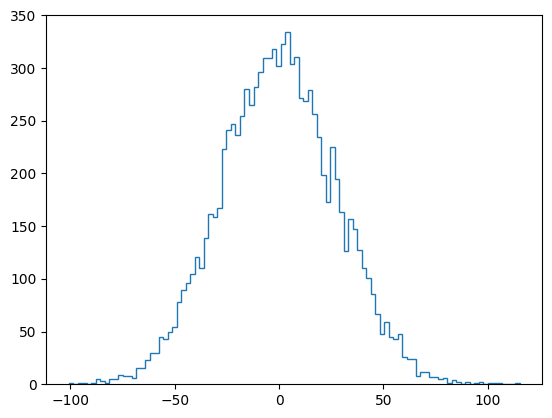

In [10]:
n_toy=10000

error_toy = np.zeros(n_toy, dtype=float)

for i_toy in range(n_toy):
    x_i_abs = np.abs(np.random.normal(mu, sigma, N))
    inte_value = inte(x_i_abs, sigma, N)
    expected_value = 2*sigma**4
    error = inte_value - expected_value
    error_toy[i_toy]=error
    
plt.hist(error_toy,bins=100,histtype='step')